# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [31]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [32]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [33]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [34]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
annual_dwelling_types = to_data.groupby("year").sum().drop(columns = ["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
annual_dwelling_types.head()

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [35]:
# Save the dataframe as a csv file
annual_dwelling_types.to_csv("Annual Dwelling Types")

Text(0, 0.5, 'Units')

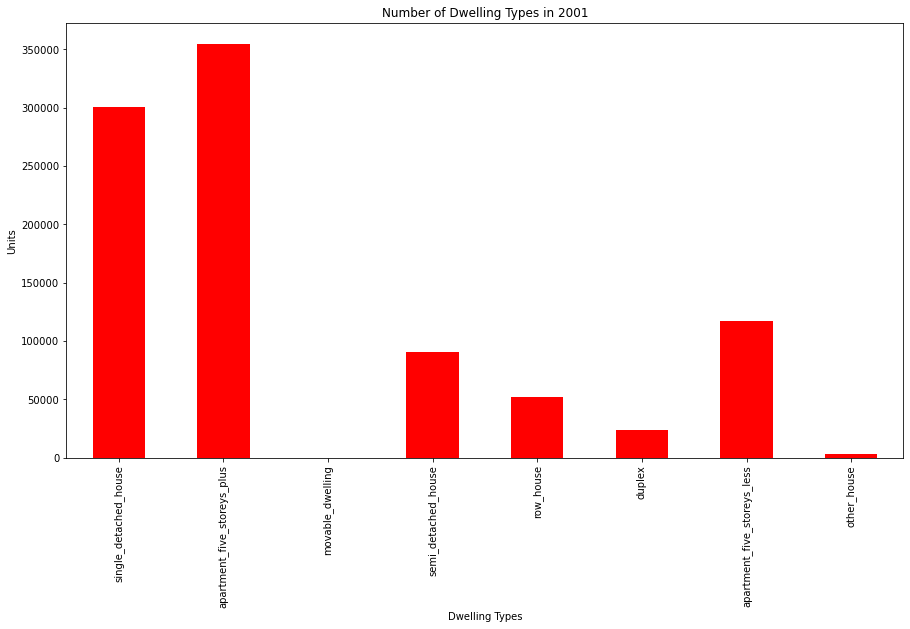

In [39]:
#2001
dwelling_types_2001 = annual_dwelling_types.iloc[0].plot.bar(
    title="Number of Dwelling Types in 2001",
    color="Red", figsize = (15,8))
dwelling_types_2001.set_xlabel("Dwelling Types")
dwelling_types_2001.set_ylabel("Units")

Text(0, 0.5, 'Units')

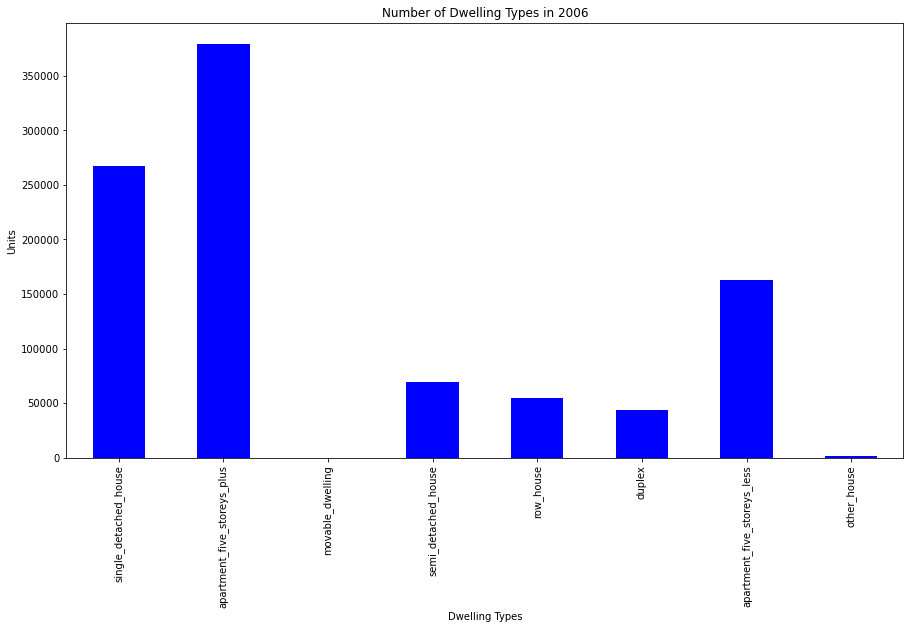

In [40]:
#2006
dwelling_types_2006 = annual_dwelling_types.iloc[1].plot.bar(
    title = "Number of Dwelling Types in 2006",
    color = "Blue", figsize = (15,8))
dwelling_types_2006.set_xlabel("Dwelling Types")
dwelling_types_2006.set_ylabel("Units")

Text(0, 0.5, 'Units')

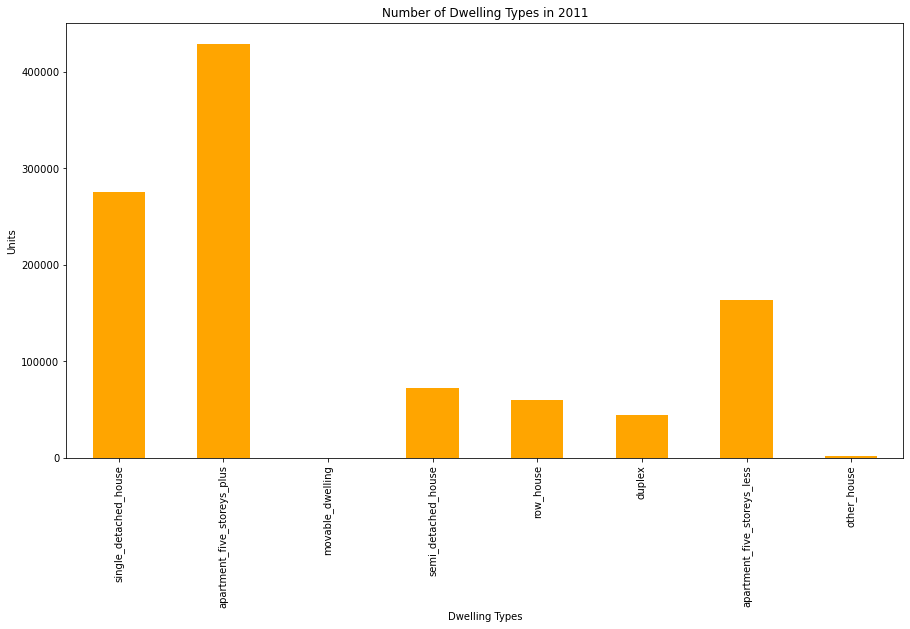

In [42]:
#2011 
dwelling_types_2011 = annual_dwelling_types.iloc[2].plot.bar(
    title = "Number of Dwelling Types in 2011",
    color = "Orange",
    figsize = (15,8))
dwelling_types_2011.set_xlabel("Dwelling Types")
dwelling_types_2011.set_ylabel("Units")

Text(0, 0.5, 'Units')

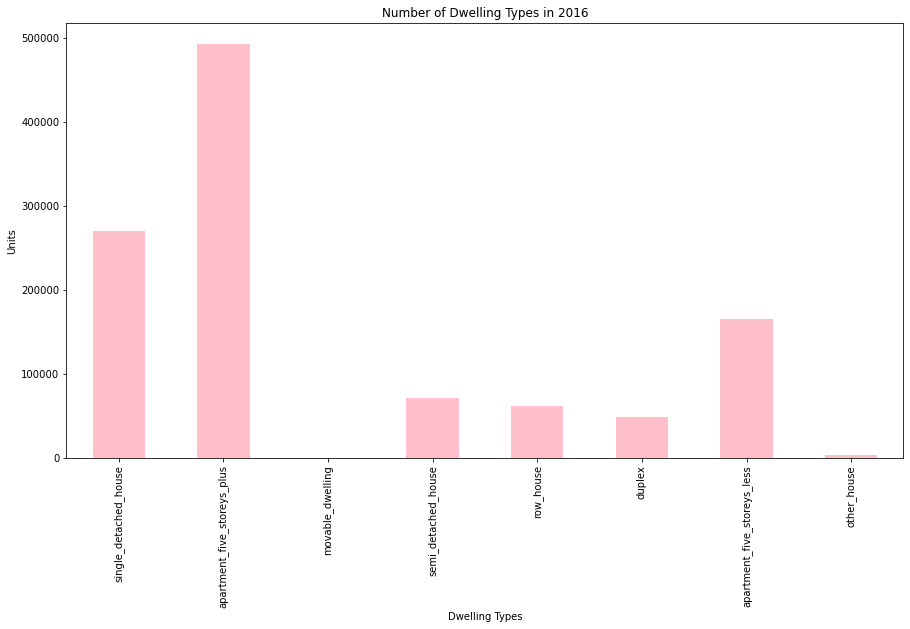

In [43]:
#2016
dwelling_types_2016 = annual_dwelling_types.iloc[3].plot.bar(
    title = "Number of Dwelling Types in 2016",
    color = "Pink",
    figsize = (15,8))
dwelling_types_2016.set_xlabel("Dwelling Types")
dwelling_types_2016.set_ylabel("Units")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [45]:
# Calculate the average monthly shelter costs for owned and rented dwellings
average_dwelling_costs = to_data.groupby("year").mean()
average_dwelling_costs

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001            2149.500000                  2535.821429          0.535714   
2006            1906.142857                  2710.000000          1.178571   
2011            1963.857143                  3065.857143          0.714286   
2016            1926.285714                  3523.357143          0.678571   

      semi_detached_house   row_house      duplex  \
year                                                
2001           649.964286  373.964286  169.892857   
2006           495.928571  390.642857  314.964286   
2011           517.714286  431.107143  319.642857   
2016           508.571429  439.750000  347.035714   

      apartment_five_storeys_less  other_house  average_house_value  \
year                                                                  
2001                   835.000000    21.714286        289882.885714   
2006                  1163.214286     9.535714        424059.664286   
2011                  1170.678571    15.464286        530424.721429   
2016                  1182.678571    20.321429        664068.328571   

      shelter_costs_owned  shelter_costs_rented  
year                                             
2001           846.878571           1085.935714  
2006          1316.800000            925.414286  
2011          1448.214286           1019.792857  
2016          1761.314286           1256.321429

In [46]:
average_monthly_shelter_costs = average_dwelling_costs[["shelter_costs_owned", "shelter_costs_rented"]]
average_monthly_shelter_costs

shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

Text(0, 0.5, 'Average Costs')

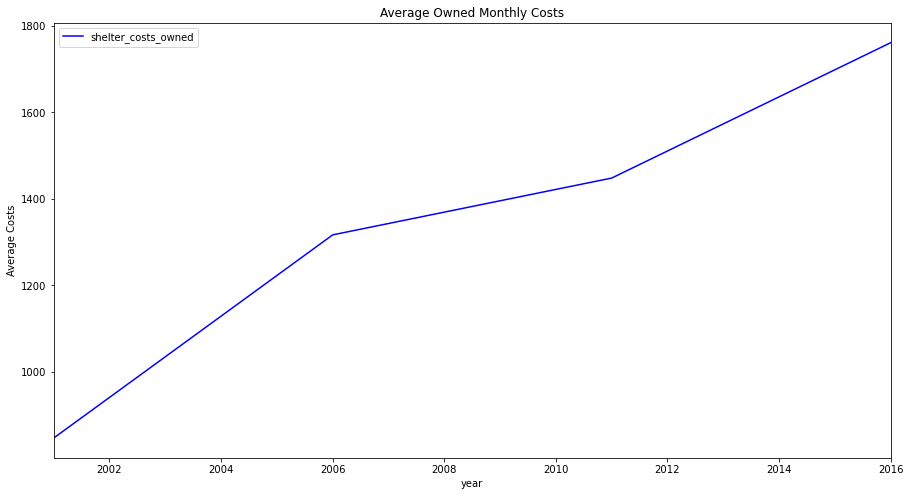

In [48]:
# Helper create_line_chart function
owned_shelter_costs = average_monthly_shelter_costs["shelter_costs_owned"].plot.line(
    title = "Average Owned Monthly Costs",
    color = "Blue",
    figsize = (15,8),
    legend=True)
owned_shelter_costs.set_ylabel("Average Costs")

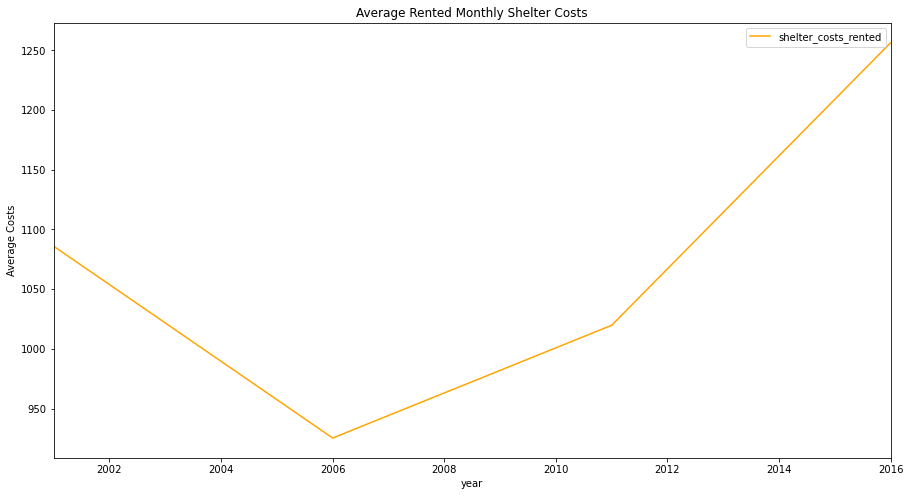

In [51]:
rented_shelter_costs = average_monthly_shelter_costs["shelter_costs_rented"].plot.line(
    title = "Average Rented Monthly Shelter Costs",
    color= "Orange",
    figsize = (15,8),
    legend = True).set_ylabel("Average Costs")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [54]:
# Calculate the average house value per year
average_house_value = average_dwelling_costs[["average_house_value"]]
average_house_value

average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

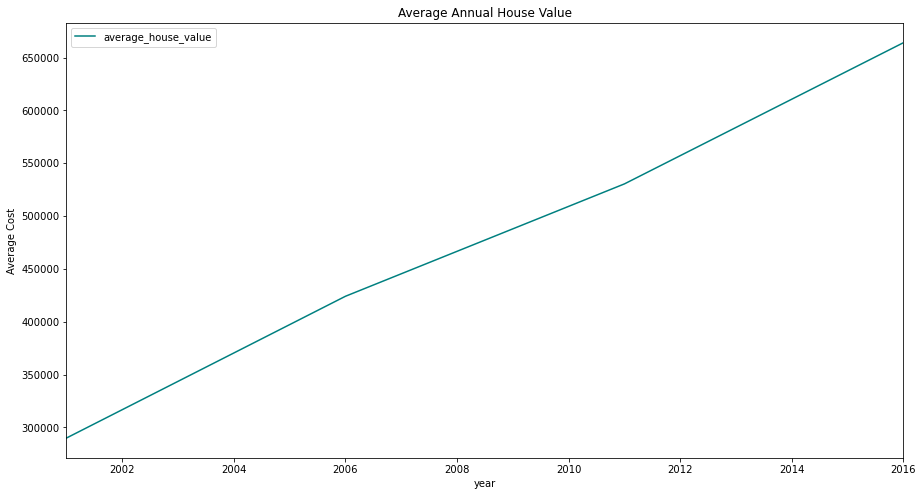

In [58]:
# Plot the average house value per year as a line chart
annual_house_value_line = average_house_value.plot.line(
    title = "Average Annual House Value",
    color = "Teal",
    figsize=(15,8),
    legend=True).set_ylabel("Average Cost")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [62]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_house_value_by_neighbourhood_df = to_data.groupby(["year", "neighbourhood"]).mean()
avg_house_value_by_neighbourhood_df.head(10)

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                                3715   
     Agincourt South-Malvern West                   3250   
     Alderwood                                      3175   
     Annex                                          1060   
     Banbury-Don Mills                              3615   
     Bathurst Manor                                 2405   
     Bay Street Corridor                              10   
     Bayview Village                                2170   
     Bayview Woods-Steeles                          1650   
     Bedford Park-Nortown                           4985   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                      1480   
     Agincourt South-Malvern West                         1835   
     Alderwood                                             315   
     Annex                                                6090   
     Banbury-Don Mills                                    4465   
     Bathurst Manor                                       1550   
     Bay Street Corridor                                  7575   
     Bayview Village                                       630   
     Bayview Woods-Steeles                                1715   
     Bedford Park-Nortown                                 2080   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                              0                 1055   
     Agincourt South-Malvern West                 0                  545   
     Alderwood                                    0                  470   
     Annex                                        5                 1980   
     Banbury-Don Mills                            0                  240   
     Bathurst Manor                               0                  130   
     Bay Street Corridor                          0                    0   
     Bayview Village                              0                  170   
     Bayview Woods-Steeles                        0                  925   
     Bedford Park-Nortown                         0                   45   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                    1295     195   
     Agincourt South-Malvern West        455     105   
     Alderwood                            50     185   
     Annex                               605     275   
     Banbury-Don Mills                   380      15   
     Bathurst Manor                      130     375   
     Bay Street Corridor                  15       0   
     Bayview Village                     765      15   
     Bayview Woods-Steeles               105      10   
     Bedford Park-Nortown                 40     210   

                                   apartment_five_storeys_less  other_house  \
year neighbourhood                                                            
2001 Agincourt North                                       185            5   
     Agincourt South-Malvern West                          425            0   
     Alderwood                                             370            0   
     Annex                                                3710          165   
     Banbury-Don Mills                                    1360            0   
     Bathurst Manor                                        745            0   
     Bay Street Corridor                                   240            0   
     Bayview Village                                       640            0   
     Bayview Woods-Steeles                                 170            5   
     Bedford Park-Nortown                                 1235    

In [63]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
avg_neighbourhood_house_value = avg_house_value_by_neighbourhood_df[["average_house_value"]]
# The plot should have a dropdown selector for the neighbourhood
avg_neighbourhood_house_value.head(10)
# YOUR CODE HERE!
avg_neighbourhood_house_value.hvplot.line("year", groupby="neighbourhood", width=700, color="blue")

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [66]:
# Fetch the data of all dwelling types per year
avg_dwelling_types = avg_house_value_by_neighbourhood_df.drop(columns = ["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
avg_dwelling_types.head()

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                                3715   
     Agincourt South-Malvern West                   3250   
     Alderwood                                      3175   
     Annex                                          1060   
     Banbury-Don Mills                              3615   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                      1480   
     Agincourt South-Malvern West                         1835   
     Alderwood                                             315   
     Annex                                                6090   
     Banbury-Don Mills                                    4465   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                              0                 1055   
     Agincourt South-Malvern West                 0                  545   
     Alderwood                                    0                  470   
     Annex                                        5                 1980   
     Banbury-Don Mills                            0                  240   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                    1295     195   
     Agincourt South-Malvern West        455     105   
     Alderwood                            50     185   
     Annex                               605     275   
     Banbury-Don Mills                   380      15   

                                   apartment_five_storeys_less  other_house  
year neighbourhood                                                           
2001 Agincourt North                                       185            5  
     Agincourt South-Malvern West                          425            0  
     Alderwood                                             370            0  
     Annex                                                3710          165  
     Banbury-Don Mills                                    1360            0

In [72]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
avg_dwelling_types_bar = avg_dwelling_types.hvplot.bar("year", groupby="neighbourhood",width = 900, height = 700, rot=90 )
# The plot should have a dropdown selector for the neighbourhood
avg_dwelling_types_bar

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [73]:
# Getting the data from the top 10 expensive neighbourhoods
neighbourhood_prices = to_data.groupby("neighbourhood").mean()
neighbourhood_prices.head()

single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                          329811.5              1109.00   
Agincourt South-Malvern West             334189.0              1131.25   
Alderwood                                427922.5              1166.75   
Annex                                    746977.0              1692.75   
Banbury-Don Mills                        612039.0              1463.50   

                              shelter_costs_rented  
neighbourhood                                       
Agincourt North                             983.50  
Agincourt South-Malvern West                985.00  
Alderwood                                  1003.25  
Annex                                      1315.25  
Banbury-Don Mills                          1242.75

In [79]:
# Plotting the data from the top 10 expensive neighbourhoods
neighbourhood_prices.sort_values("average_house_value", inplace=True)
top_10_prices = neighbourhood_prices.iloc[0:10]
top_10_prices.head(10)


single_detached_house  \
neighbourhood                                              
Flemingdon Park                                     5.00   
Taylor-Massey                                     622.50   
Mount Olive-Silverstone-Jamestown                1730.00   
Thorncliffe Park                                    3.75   
Malvern                                          3693.75   
Black Creek                                       732.50   
Dorset Park                                      2106.25   
Mount Dennis                                     1028.75   
Elms-Old Rexdale                                 1036.25   
Eglinton East                                    1637.50   

                                   apartment_five_storeys_plus  \
neighbourhood                                                    
Flemingdon Park                                        6368.75   
Taylor-Massey                                          4795.00   
Mount Olive-Silverstone-Jamestown                      5916.25   
Thorncliffe Park                                       6318.75   
Malvern                                                2982.50   
Black Creek                                            4356.25   
Dorset Park                                            3743.75   
Mount Dennis                                           2238.75   
Elms-Old Rexdale                                       1377.50   
Eglinton East                                          5045.00   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                                                              
Flemingdon Park                                0.00               182.50   
Taylor-Massey                                  0.00               203.75   
Mount Olive-Silverstone-Jamestown              1.25               176.25   
Thorncliffe Park                               0.00                 0.00   
Malvern                                        0.00              1317.50   
Black Creek                                    0.00               685.00   
Dorset Park                                    0.00               326.25   
Mount Dennis                                   0.00               138.75   
Elms-Old Rexdale                               0.00                75.00   
Eglinton East                                  0.00               108.75   

                                   row_house  duplex  \
neighbourhood                                          
Flemingdon Park                       630.00    3.75   
Taylor-Massey                         216.25  150.00   
Mount Olive-Silverstone-Jamestown    1033.75  603.75   
Thorncliffe Park                      141.25    0.00   
Malvern                              3410.00  878.75   
Black Creek                          1116.25  113.75   
Dorset Park                          1318.75  405.00   
Mount Dennis                          302.50  176.25   
Elms-Old Rexdale                      476.25  153.75   
Eglinton East                         403.75  481.25   

                                   apartment_five_storeys_less  other_house  \
neighbourhood                                                                 
Flemingdon Park                                         591.25         0.00   
Taylor-Massey                                           218.75        15.00   
Mount Olive-Silverstone-Jamestown                       127.50         1.25   
Thorncliffe Park                                        187.50         5.00   
Malvern                                                 552.50        55.00   
Black Creek                                             238.75         2.50   
Dorset Park                                             413.75         3.75   
Mount Dennis                                            912.50         2.50   
Elms-Old Rexdale                                         50.00         0.00   
Eglinton East                                           251.25    

In [82]:
top_10_prices_bar = top_10_prices.hvplot.bar(title = "Tope 10 Most Expensive Neighbourhood", x="neighbourhood", y="average_house_value", height=700, rot=90)
top_10_prices_bar.opts(yformatter="%.0f")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [83]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

neighbourhood        lat        lon
0               Agincourt North  43.805441 -79.266712
1  Agincourt South-Malvern West  43.788658 -79.265612
2                     Alderwood  43.604937 -79.541611
3                         Annex  43.671585 -79.404001
4             Banbury-Don Mills  43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [84]:
# Calculate the mean values for each neighborhood
neighbourhood_mean = to_data.groupby("neighbourhood").mean()
neighbourhood_mean.reset_index(inplace=True)

neighbourhood_mean.head()


neighbourhood  single_detached_house  \
0               Agincourt North                3435.00   
1  Agincourt South-Malvern West                2897.50   
2                     Alderwood                2903.75   
3                         Annex                 751.25   
4             Banbury-Don Mills                3572.50   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                      1947.50              2.50               863.75   
1                      2180.00              1.25               375.00   
2                       302.50              1.25               503.75   
3                      7235.00              1.25              1375.00   
4                      5388.75              1.25               273.75   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0    1406.25  512.50                       547.50        10.00   
1     456.25  523.75                       628.75        32.50   
2      76.25  302.50                       502.50         1.25   
3     613.75  355.00                      4605.00        83.75   
4     626.25   32.50                      1340.00         0.00   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0             329811.5              1109.00                983.50  
1             334189.0              1131.25                985.00  
2             427922.5              1166.75               1003.25  
3             746977.0              1692.75               1315.25  
4             612039.0              1463.50               1242.75

In [88]:
# Join the average values with the neighbourhood locations
avg_value_location = pd.concat([df_neighbourhood_locations, neighbourhood_mean], axis = 1, join = "inner").drop(columns = "neighbourhood")
avg_value_location.head()

lat        lon  single_detached_house  apartment_five_storeys_plus  \
0  43.805441 -79.266712                3435.00                      1947.50   
1  43.788658 -79.265612                2897.50                      2180.00   
2  43.604937 -79.541611                2903.75                       302.50   
3  43.671585 -79.404001                 751.25                      7235.00   
4  43.737657 -79.349718                3572.50                      5388.75   

   movable_dwelling  semi_detached_house  row_house  duplex  \
0              2.50               863.75    1406.25  512.50   
1              1.25               375.00     456.25  523.75   
2              1.25               503.75      76.25  302.50   
3              1.25              1375.00     613.75  355.00   
4              1.25               273.75     626.25   32.50   

   apartment_five_storeys_less  other_house  average_house_value  \
0                       547.50        10.00             329811.5   
1                       628.75        32.50             334189.0   
2                       502.50         1.25             427922.5   
3                      4605.00        83.75             746977.0   
4                      1340.00         0.00             612039.0   

   shelter_costs_owned  shelter_costs_rented  
0              1109.00                983.50  
1              1131.25                985.00  
2              1166.75               1003.25  
3              1692.75               1315.25  
4              1463.50               1242.75

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

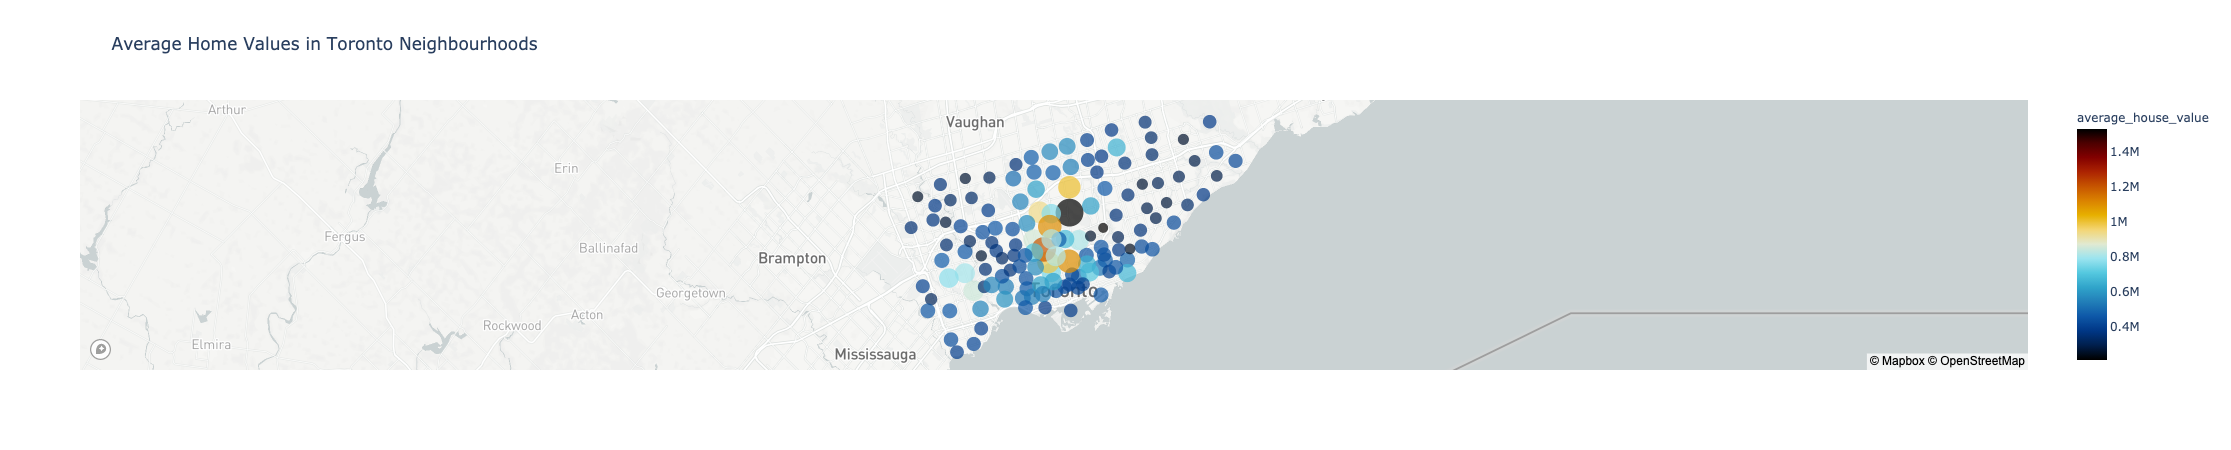

In [91]:
# Create a scatter mapbox to analyze neighbourhood info
px.set_mapbox_access_token(map_box_api)
mapbox_scatterplot = px.scatter_mapbox(avg_value_location,
                                       lat = "lat",
                                       lon = "lon",
                                       size = "average_house_value",
                                      color = "average_house_value",
                                      zoom = 9, 
                                      width = 1500,
                                      color_continuous_scale = px.colors.cyclical.IceFire,
                                      title="Average Home Values in Toronto Neighbourhoods",
                                       hover_data = ["single_detached_house", 
                                          "apartment_five_storeys_plus", 
                                          "movable_dwelling", 
                                          "semi_detached_house", 
                                          "row_house", 
                                          "duplex", 
                                          "apartment_five_storeys_less", 
                                          "other_house"]
                                      )

mapbox_scatterplot

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [ ]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [ ]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [ ]:
# Create the sunburst chart
# YOUR CODE HERE!